<a href="https://colab.research.google.com/github/berserker1/M/blob/master/RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [0]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# **Importing Data and Preprocessing**

In [2]:
files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


{'Social_Network_Ads.csv': b'User ID,Gender,Age,EstimatedSalary,Purchased\r\n15624510,Male,19,19000,0\r\n15810944,Male,35,20000,0\r\n15668575,Female,26,43000,0\r\n15603246,Female,27,57000,0\r\n15804002,Male,19,76000,0\r\n15728773,Male,27,58000,0\r\n15598044,Female,27,84000,0\r\n15694829,Female,32,150000,1\r\n15600575,Male,25,33000,0\r\n15727311,Female,35,65000,0\r\n15570769,Female,26,80000,0\r\n15606274,Female,26,52000,0\r\n15746139,Male,20,86000,0\r\n15704987,Male,32,18000,0\r\n15628972,Male,18,82000,0\r\n15697686,Male,29,80000,0\r\n15733883,Male,47,25000,1\r\n15617482,Male,45,26000,1\r\n15704583,Male,46,28000,1\r\n15621083,Female,48,29000,1\r\n15649487,Male,45,22000,1\r\n15736760,Female,47,49000,1\r\n15714658,Male,48,41000,1\r\n15599081,Female,45,22000,1\r\n15705113,Male,46,23000,1\r\n15631159,Male,47,20000,1\r\n15792818,Male,49,28000,1\r\n15633531,Female,47,30000,1\r\n15744529,Male,29,43000,0\r\n15669656,Male,31,18000,0\r\n15581198,Male,31,74000,0\r\n15729054,Female,27,137000,1\r\n1

In [0]:
data=pd.read_csv('Social_Network_Ads.csv')
x=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

# **Train_Test_Split and Feature Transform**

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [10]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# **Applying Classifier for n_estimators ranging from 1 to 100 and selecting the optimal**

In [0]:
error=[]
for i in range(1,101):
  classifier=RandomForestClassifier(n_estimators=i)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  error.append(np.mean(y_pred!=y_test))
print(error)

## Taking minimum error value n_estimator

In [0]:
classifier=RandomForestClassifier(n_estimators=np.argmin(error)+1)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

## Confusion Matrix

In [23]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[50  7]
 [ 2 21]]


# **Plotting**

<function matplotlib.pyplot.show>

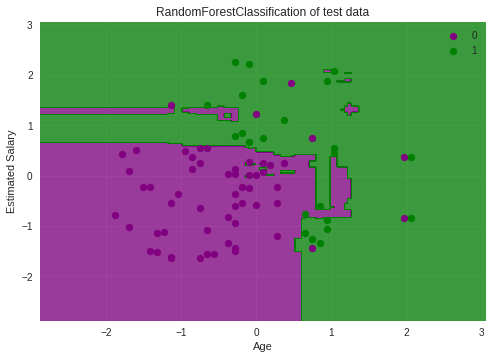

In [24]:
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('purple','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('purple','green'))(i),label=j)
plt.title('RandomForestClassification of test data')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show